<a href="https://colab.research.google.com/github/laracoen/MKLPM/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost scikit-learn pandas -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
!wget https://github.com/MKLPM/MKLPM/blob/main/Anotacije.tsv

--2024-06-08 21:47:34--  https://github.com/MKLPM/MKLPM/blob/main/Anotacije.tsv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Anotacije.tsv’

Anotacije.tsv           [  <=>               ] 495.49K  2.19MB/s    in 0.2s    

2024-06-08 21:47:35 (2.19 MB/s) - ‘Anotacije.tsv’ saved [507382]



In [ ]:
texts = []
labels = []
with open('/content/Anotacije.tsv') as input_file:
    for i, line in enumerate(input_file):
        line = line.strip()

        print(i, line, line.rsplit("\t"))

        text, label = line.split("\t")
        texts.append(text)
        labels.append(label)

        print(i, text, label)

0  ['']


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
len(texts),len(labels)

(0, 0)

In [ ]:
set(labels)

set()

In [ ]:
lower_cased_label = [x.lower() for x in labels]
lower_cased_label

[]

In [ ]:
set(labels)

set()

In [ ]:
import pandas as pd

df = pd.DataFrame({"text": texts, "label": labels})

In [ ]:
df["label"].value_counts()

NameError: name 'df' is not defined

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
labels = le.transform(labels)
print(labels)

['mješovito' 'negativno' 'neutralno' 'pozitivno']
[2 2 2 ... 3 3 3]


In [ ]:
set(labels)

{0, 1, 2, 3}

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

In [ ]:
"Size of train:",len(texts_train), "test set", len(texts_test)

('Size of train:', 2360, 'test set', 591)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [ ]:
# Train the SVC model
model_svc = SVC()
model_svc.fit(X_train, labels_train)

In [ ]:
# Make predictions on the test set
predictions_svc = model_svc.predict(X_test)

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))
f1 = f1_score(labels_test, predictions, average='macro')
print("F1-Score: {:.2f}%".format(f1 * 100))

Accuracy: 54.99%
F1-Score: 44.68%


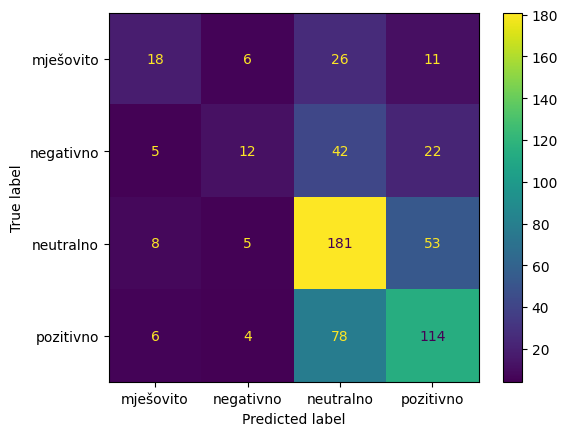

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix( labels_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=le.classes_)

disp.plot()


In [ ]:
# Create a DataFrame with text, predictions and true labels
data = {'Text':texts_test, 'Actual-Label': labels_test, 'Predicted-Label': predictions}
df_errors = pd.DataFrame(data)
print(len(df_errors))
df_errors[df_errors["Actual-Label"] != df_errors['Predicted-Label']]
# here you can see the sameples in the test set that are wrongly predicted

591


,Text,Actual-Label,Predicted-Label
4,koliko god shvaćam genijalnost njegove karakte...,0,2
5,"prva bračna noć je zapravo silovanje, iako ona...",2,0
7,čitajući početak i primjećujući gotovo luđačku...,2,3
12,tekst je napisan izuzetno loše.,1,3
17,ovaj je roman kao tamna čokolada najveće kvali...,0,3
...,...,...,...
585,sad su mi se svidjela samo dva; i jedva.,0,3
587,"moja perspektiva se promijenila s vremenom, al...",3,2
588,to bi vjerojatno dosta pomoglo učenicima i stu...,3,2
589,kao čitatelji svjesni smo kako nesretno lucija...,1,2
